# Ingredients of convolutionary filters

The basic ingredients of convolutionary neural networks (CNNs) are:

1. **convolution** filters
2. non-linear **activation**
3. **pooling** operation

We'll leave the non-linear activation for the next session on neural nets. 

Here, we'll focus on the image processing operations: convolution and pooling. 


In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import scipy as sp 
from scipy.ndimage.filters import convolve
from skimage import data
plt.rcParams['image.cmap'] = 'viridis'

# What is convolution?

Convolution is the application of a filter over an image. It thereby transforms the input image into a different image, called a feature map.

To illustrate what is convolution, let's
1. get an input image and
2. define some handcrafted convolution filters

and apply these filters on the input image.

(-0.5, 383.5, 302.5, -0.5)

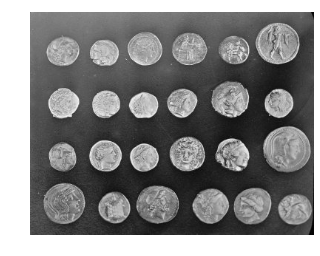

In [2]:
#im = data.checkerboard()
#im = data.astronaut()
#im = data.rocket()
im = data.coins()
if im.ndim == 3:
    im = np.mean(im, axis=2)
im = np.asarray(im, dtype=np.float32)
plt.imshow(im, cmap='gray')
plt.axis('off')

**(Handcrafted) convolution filters**

In [3]:
cross =  [[-1,1,-1],
          [1,1,1],
          [-1,1,-1]]

sobel1 = [[1,0,-1],
          [2,0,-2],
          [1,0,-1]]

sobel2 = np.array(sobel1).T

emboss = [[-1,-1, 0],
          [-1, 0, 1],
          [ 0, 1, 1]]

sharpen =[[-1,-1,-1],
          [-1, 9,-1],
          [-1,-1,-1]]

sharpen =[[ 1, 1, 1],
          [ 1, -7, 1],
          [ 1, 1, 1]]

mean    =[[ 1, 1, 1],
          [ 1, 1, 1],
          [ 1, 1, 1]]


In [4]:
im1 = convolve(im, cross)
im2 = convolve(im, sobel2)
im3 = convolve(im, sobel1)
im4 = convolve(im, emboss)
im5 = convolve(im, sharpen)
im6 = convolve(im, mean)

In [11]:
def plot_kernel(kernel, ax, label):
    ax.imshow(kernel, interpolation='none')
    for (j,i),text in np.ndenumerate(kernel):
        ax.text(i,j,int(text),ha='center',va='center',fontsize=14, color='w')
        ax.text(i,j,int(text),ha='center',va='center',fontsize=14, color='w')
    ax.set_title(label)
    ax.axis('off')
    
def plot_feature_map(image, ax, label):
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

Show the convolution filter and the image after application of the filter.

In [12]:
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(10,20))#, sharex=True, sharey=True)

plot_kernel(cross,   ax[0,0], 'cross')
plot_kernel(sobel2,  ax[2,0], 'sobel x')
plot_kernel(sobel1,  ax[1,0], 'sobel y')
plot_kernel(emboss,  ax[3,0], 'emboss')
plot_kernel(sharpen, ax[4,0], 'sharpen')
plot_kernel(mean,    ax[5,0], 'mean')

plot_feature_map(im1, ax[0,1], 'cross')
plot_feature_map(im2, ax[1,1], 'sobel')
plot_feature_map(im3, ax[2,1], 'sobel')
plot_feature_map(im4, ax[3,1], 'emboss')
plot_feature_map(im5, ax[4,1], 'sharpen')
plot_feature_map(im6, ax[5,1], 'mean')

# Random filters

As you can see, convolution filters are useful to extract features from images, e.g. Sobel filters can detect edges. Often, however, we do not know in advance what features we'd like to extract. Instead, we'd like to **learn** to extract useful features according to a number of examples, using CNNs. 

In CNNs, instead of handcrafted convolution filters (aka kernels), we **learn** the values (aka weights) of the filters to detect particular features. 

Before learning, the kernels are typically random.

Here, we generate 25 random kernels show their resulting feature maps. This is identical to what the first layer in an unlearned convnet with 25 3x3 kernels does.

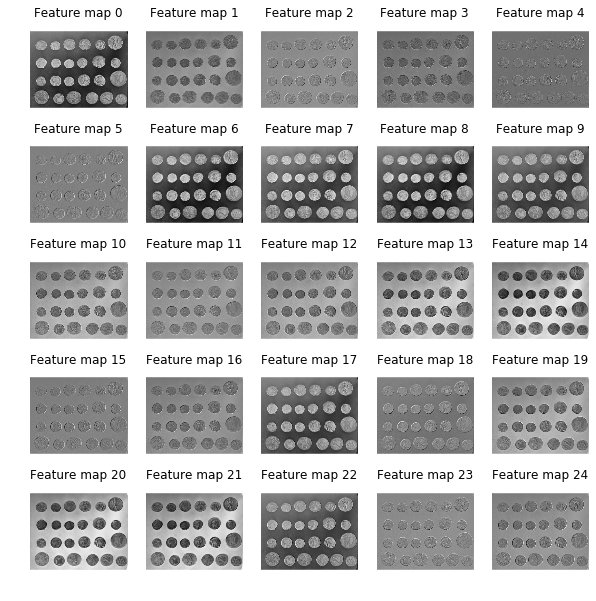

In [7]:
n = 25
nr = int(np.ceil(np.sqrt(n)))
fig1, ax1 = plt.subplots(nrows=nr, ncols=nr, figsize=(10,10), sharex=True, sharey=True)
ax1 = ax1.flatten()
fig2, ax2 = plt.subplots(nrows=nr, ncols=nr, figsize=(10,10), sharex=True, sharey=True)
ax2 = ax2.flatten()


for i in range(n):
    rand_kernel = np.random.normal(loc=0.0, scale=4.0, size=[3,3])
    plot_kernel(rand_kernel, ax1[i], 'Kernel {}'.format(i))

    image = convolve(im, rand_kernel)
    plot_feature_map(image, ax2[i],'Feature map {}'.format(i))
    
    # store images as feature maps
    try:
        feature_maps = np.dstack([feature_maps, image])
    except:
        feature_maps = image


# Pooling

If we forget about the activation layer for the moment, the next step is pooling, typically `MaxPooling`. 

Pooling downsamples the feature maps by taking the local mean or maximum of each feature map. 

For purpose of illustration, we take the maximum of each 8x8 block (whereas in convnets 2x2 is most often used).

In [8]:
# size of pool blocks
pool_size = (8,8)

def pooling(image, size=(2,2), mode='max'):
    from skimage.measure import block_reduce
    if mode == 'mean':
        return block_reduce(image, block_size=size, func=np.mean)
    else: #mode == 'max':
        return block_reduce(image, block_size=size, func=np.max)

fig, ax = plt.subplots(nrows=nr, ncols=nr, figsize=(15,15), sharex=True, sharey=True)
ax = ax.flatten()
for i in range(n):
    pooled = pooling(feature_maps[:,:,i], pool_size)
    ax[i].imshow(pooled, cmap='gray')
    ax[i].set_title('Map {}  Size {}'.format(i, pooled.shape), fontsize=10)
    ax[i].axis('off')
